In [2]:
import numpy as np
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
import random
from tqdm import tqdm
import time
sns.set()

In [3]:
from algorithms.es import ESPopulation
from algorithms.ce import CEOptimiser

%load_ext autoreload

%autoreload 2

#### Function to study: Shubert function with given number of dimensions

In [4]:
def shubert(x):
    """Takes input array with the points at which to evaluate the function
    args: x: dim*num_points array of points
    
    returns: val: list of values at desired points"""
    dim = x.shape[1]
    vals = []
    
    for sample in x:

        i_array = np.tile(sample, (5,1))
        j_array = np.tile(range(5), (dim,1)).T + 1

        assert i_array.shape == j_array.shape

        val_array = j_array * np.sin((j_array+1)*i_array + j_array)

        vals.append(np.sum(np.sum(val_array, axis=1), axis=0))
    
    return np.array(vals)

#### Plotting setup

(100, 100)


(-30, 30)

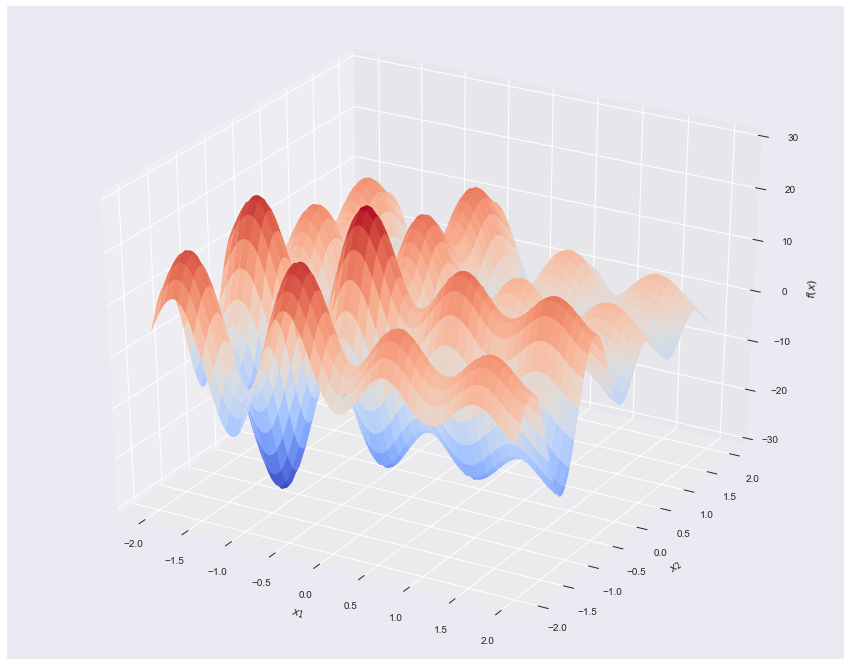

In [4]:
fig = plt.figure(figsize=(15,12))
ax = fig.gca(projection='3d')

sns.set_context("poster")

# Make data.
x_range = np.linspace(-2,2,100)
x1, x2 = np.meshgrid(x_range, x_range)
positions = np.vstack([x1.ravel(), x2.ravel()]).T
z = shubert(positions).reshape(-1,100)
print(z.shape)

# Plot the surface.
surf = ax.plot_surface(x1, x2, z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=True)
ax.set_xlabel("\n" + r"$x_{1}$", linespacing=4)
ax.set_ylabel("\n" + r"$x_{2}$", linespacing=4)
ax.set_zlabel("\n" + r"$f(x)$", linespacing=4)

# Customize the z axis.
ax.set_zlim(-30, 30)

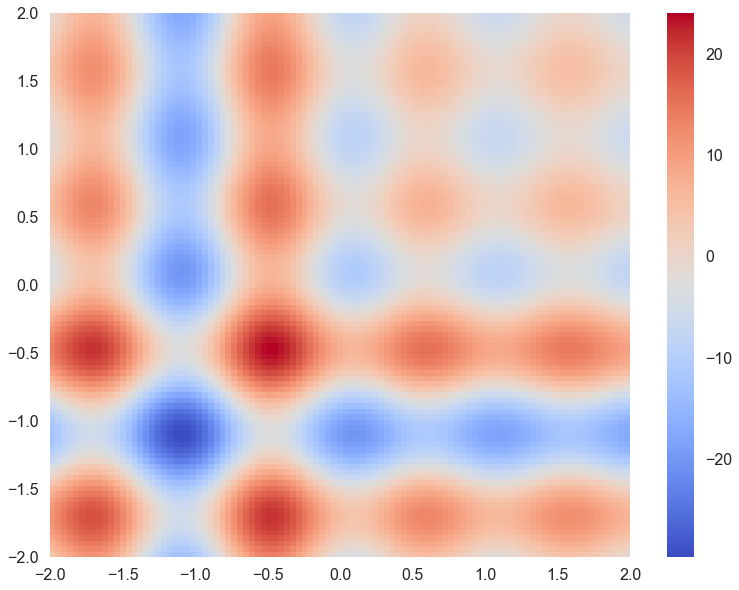

In [5]:
plt.figure(figsize=(13,10))

plt.pcolormesh(x1, x2, z, cmap=cm.coolwarm)
plt.colorbar()

#### 10-fold CV on performance to check that the weighted version converges faster

In [72]:
non_fitness = np.zeros((60,10))
for i in range(10):
    test_non = ESPopulation(pop_size=200, dims=5)
    test_non.optimise(num_evals=60, plot=False, weighted=False, tol=0)
    non_fitness[:len(test_non.fitness_log),i] = test_non.fitness_log

100%|██████████| 60/60 [00:08<00:00,  7.32it/s]


In [73]:
fitness = np.zeros((60,10))
for i in range(10):
    test = ESPopulation(pop_size=200, dims=5)
    test.optimise(num_evals=60, plot=False, weighted=True, tol=0)
    fitness[:len(test.fitness_log),i] = test.fitness_log

100%|██████████| 60/60 [00:08<00:00,  6.68it/s]


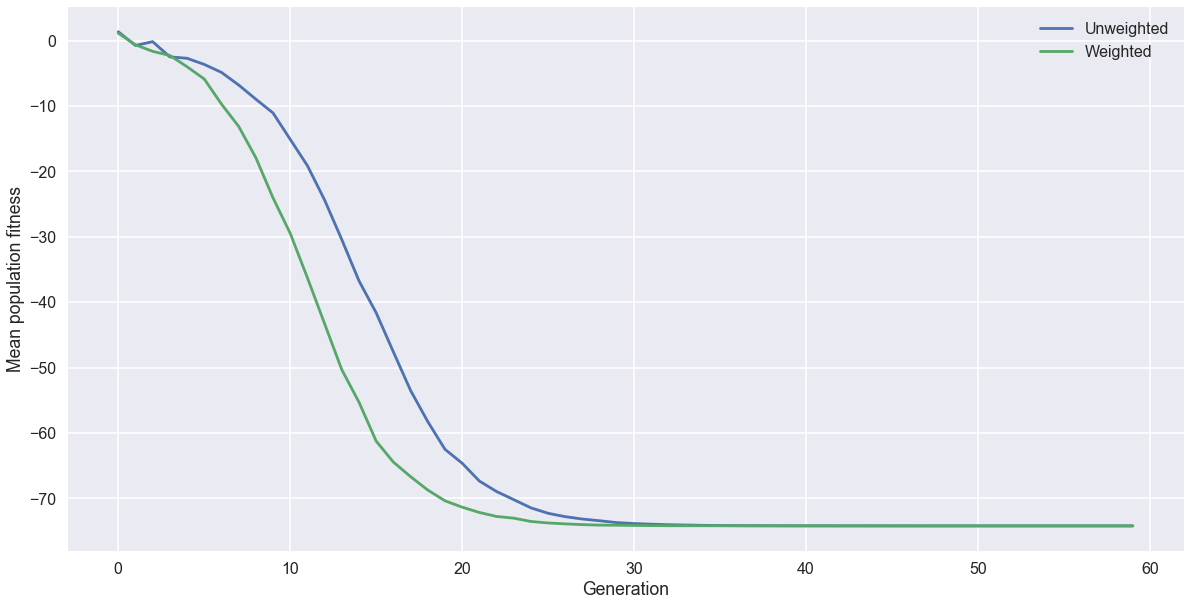

In [74]:
sns.set_context("poster")
plt.figure(figsize=(20,10))
plt.plot(np.mean(non_fitness, axis=1))
plt.plot(np.mean(fitness, axis=1))
plt.xlabel("Generation")
plt.ylabel("Mean population fitness")
plt.legend(["Unweighted", "Weighted"])

In [88]:
print(np.mean(fitness, axis=1))
print(np.mean(non_fitness, axis=1))
print(np.mean(fitness_ce, axis=1))

[  1.12695652  -0.63915764  -1.6428026   -2.26986067  -3.99244346
  -5.86927068  -9.70035577 -13.10474001 -17.89158536 -24.04233919
 -29.45673427 -36.25530428 -43.27916771 -50.31217489 -55.28019114
 -61.23263891 -64.43678086 -66.65998822 -68.7136947  -70.35296699
 -71.32836696 -72.13769796 -72.74873181 -73.00672457 -73.51574641
 -73.74250395 -73.88354766 -73.99883467 -74.07020034 -74.08774857
 -74.12138771 -74.14474513 -74.16316925 -74.16628933 -74.16466915
 -74.1741359  -74.18178818 -74.18526057 -74.18668921 -74.18736552
 -74.18803086 -74.18841506 -74.18899109 -74.18894923 -74.18923564
 -74.18933224 -74.18945617 -74.18954083 -74.18942802 -74.18959904
 -74.1896517  -74.1896955  -74.18967439 -74.18971909 -74.18971156
 -74.18973062 -74.18974388 -74.18974725 -74.18974905 -74.18974945]
[  1.3580718   -0.74541737  -0.16563268  -2.48828824  -2.70396558
  -3.64238642  -4.85965294  -6.78210175  -8.95383033 -11.06227861
 -15.09566334 -19.11527987 -24.37417268 -30.42746947 -36.73253339
 -41.6210

### Cross-entropy method

In [90]:
fitness_ce = np.zeros((60,20))
for i in range(20):
    test = CEOptimiser(pop_size=400, dims=2, init_var=4)
    test.optimise(num_evals=60, plot=False, weighted=False, sample_factor=5, tol=0)
    fitness_ce[:len(test.fitness_log),i] = test.fitness_log

100%|██████████| 60/60 [00:01<00:00, 43.02it/s]


In [92]:
test.fitness

array([-29.67590005, -29.67590005, -29.67590005, -29.67590005,
       -29.67590005, -29.67590005, -29.67590005, -29.67590005,
       -29.67590005, -29.67590005, -29.67590005, -29.67590005,
       -29.67590005, -29.67590005, -29.67590005, -29.67590005,
       -29.67590005, -29.67590005, -29.67590005, -29.67590005,
       -29.67590005, -29.67590005, -29.67590005, -29.67590005,
       -29.67590005, -29.67590005, -29.67590005, -29.67590005,
       -29.67590005, -29.67590005, -29.67590005, -29.67590005,
       -29.67590005, -29.67590005, -29.67590005, -29.67590005,
       -29.67590005, -29.67590005, -29.67590005, -29.67590005,
       -29.67590005, -29.67590005, -29.67590005, -29.67590005,
       -29.67590005, -29.67590005, -29.67590005, -29.67590005,
       -29.67590005, -29.67590005, -29.67590005, -29.67590005,
       -29.67590005, -29.67590005, -29.67590005, -29.67590005,
       -29.67590005, -29.67590005, -29.67590005, -29.67590005,
       -29.67590005, -29.67590005, -29.67590005, -29.67

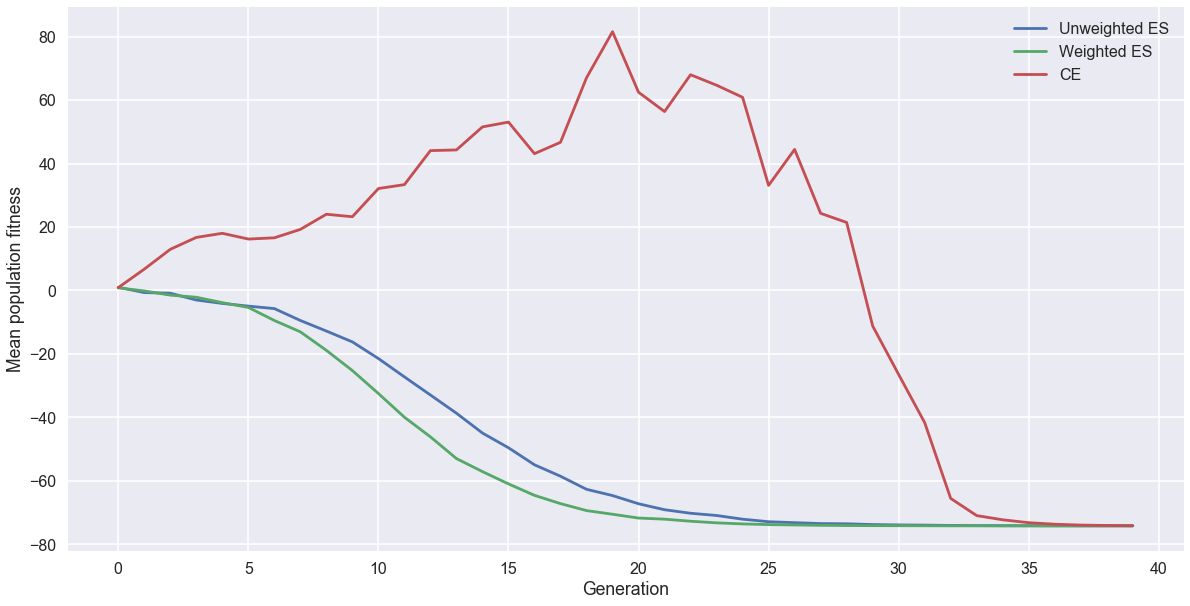

In [50]:
sns.set_context("poster")
plt.figure(figsize=(20,10))
plt.plot(np.mean(non_fitness, axis=1))
plt.plot(np.mean(fitness, axis=1))
plt.plot(np.mean(fitness_ce, axis=1))
plt.xlabel("Generation")
plt.ylabel("Mean population fitness")
plt.legend(["Unweighted ES", "Weighted ES", "CE"])
plt.savefig("convergence.png", bbox_inches='tight', dpi=200)

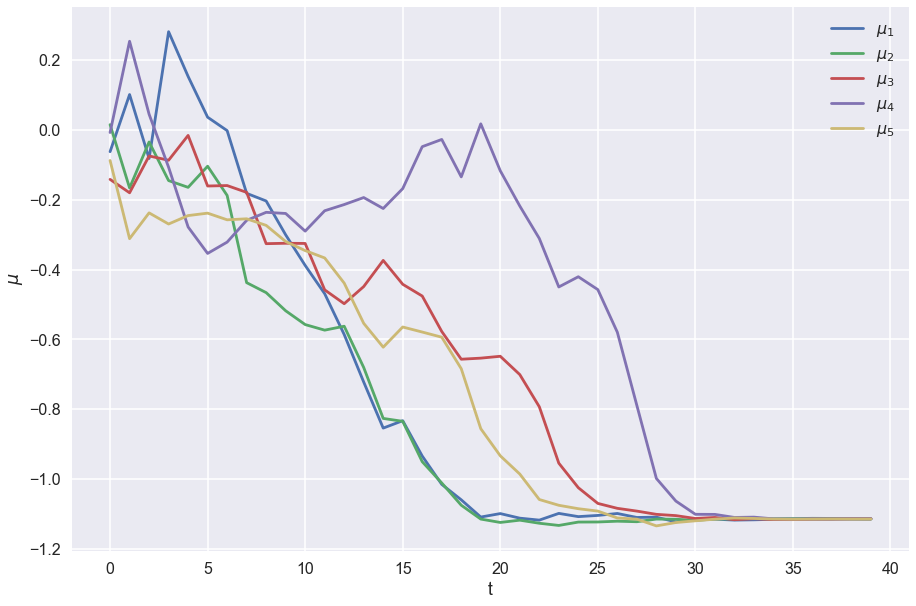

In [28]:
plt.figure(figsize=(15,10))
plt.plot(test.mean_log)
plt.xlabel(r"t")
plt.ylabel(r"$\mu$")
plt.legend([r"$\mu_{1}$", r"$\mu_{2}$", r"$\mu_{3}$", r"$\mu_{4}$", r"$\mu_{5}$"])
plt.savefig("ce_means.png", bbox_inches='tight', dpi=200)

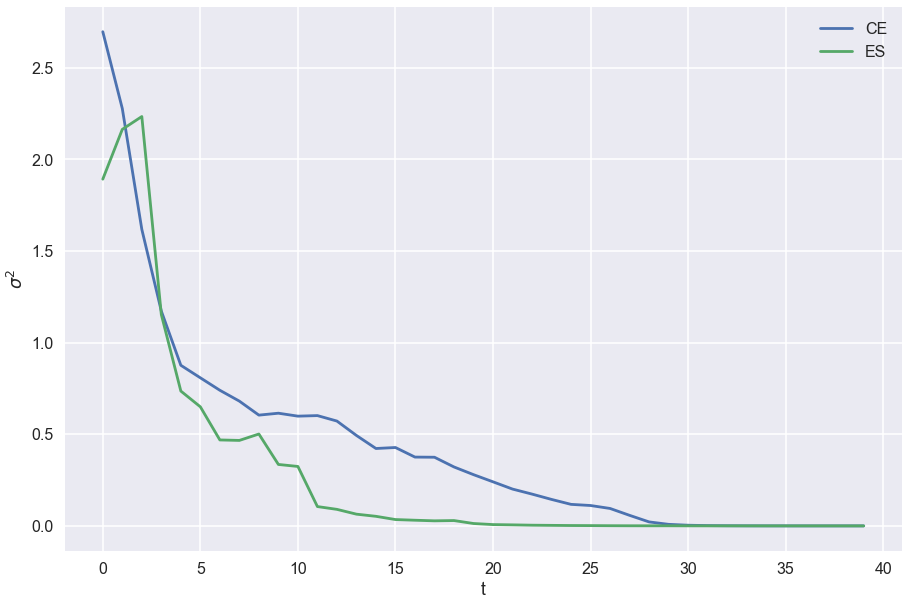

In [26]:
plt.figure(figsize=(15,10))
plt.plot(np.mean(test.var_log, axis=1))
plt.plot(np.mean(test_non.var_log, axis=1))
plt.xlabel(r"t")
plt.ylabel(r"$\sigma^{2}$")
plt.legend(["CE", "ES"])
plt.savefig("var_reduce.png", bbox_inches='tight', dpi=200)

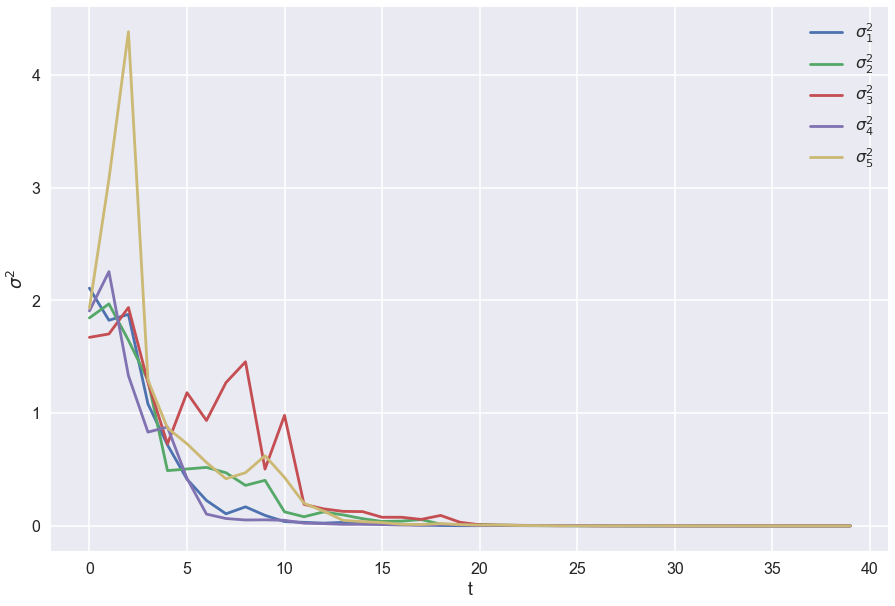

In [23]:
plt.figure(figsize=(15,10))
plt.plot(test_non.var_log)
plt.xlabel(r"t")
plt.ylabel(r"$\sigma^{2}$")
plt.legend([r"$\sigma^{2}_{1}$", r"$\sigma^{2}_{2}$", r"$\sigma^{2}_{3}$", r"$\sigma^{2}_{4}$", r"$\sigma^{2}_{5}$"])

### Plot convergence time varying with problem dimensions, up to 20.

In [6]:
opt_time = np.zeros((10,20))
for j in range(10):
    for i in range(20):
        test = CEOptimiser(pop_size=200, dims=i+2, init_var=3)
        test.optimise(num_evals=150, plot=False, weighted=False, sample_factor=5, tol=0.01)
        opt_time[j,i] = len(test.fitness_log)

 70%|███████   | 105/150 [00:01<00:00, 69.09it/s]


In [7]:
esopt_time = np.zeros((10,20))
for j in range(10):
    for i in range(20):
        test = ESPopulation(pop_size=200, dims=i+2)
        test.optimise(num_evals=150, plot=False, weighted=True, tol=0.01)
        esopt_time[j,i] = len(test.fitness_log)

  0%|          | 0/150 [00:00<?, ?it/s]/Users/dominickirkham/Documents/IIB/IIB-cw/4M17-2/algorithms/es.py:156: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  self.pop[n] += np.random.multivariate_normal(np.zeros(self.cov.shape[0]), self.cov[:,:,n])
 21%|██▏       | 32/150 [00:08<00:28,  4.11it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

  1%|          | 1/150 [00:00<00:44,  3.35it/s]

  1%|▏         | 2/150 [00:00<00:42,  3.44it/s]

  2%|▏         | 3/150 [00:00<00:42,  3.50it/s]

  3%|▎         | 4/150 [00:01<00:41,  3.54it/s]

  3%|▎         | 5/150 [00:01<00:40,  3.56it/s]

  4%|▍         | 6/150 [00:01<00:40,  3.57it/s]

  5%|▍         | 7/150 [00:01<00:40,  3.56it/s]

  5%|▌         | 8/150 [00:02<00:39,  3.58it/s]

  6%|▌         | 9/150 [00:02<00:39,  3.60it/s]

  7%|▋         | 10/150 [00:02<00:38,  3.59it/s]

  7%|▋         | 11/150 [00:03<00:38,  3.61it/s]

  8%|▊         | 12/150 [00:03<00:38,  3.59it/s]

  9%|▊         | 13/150 [00:03<00:37,  3.62it/s

KeyboardInterrupt: 

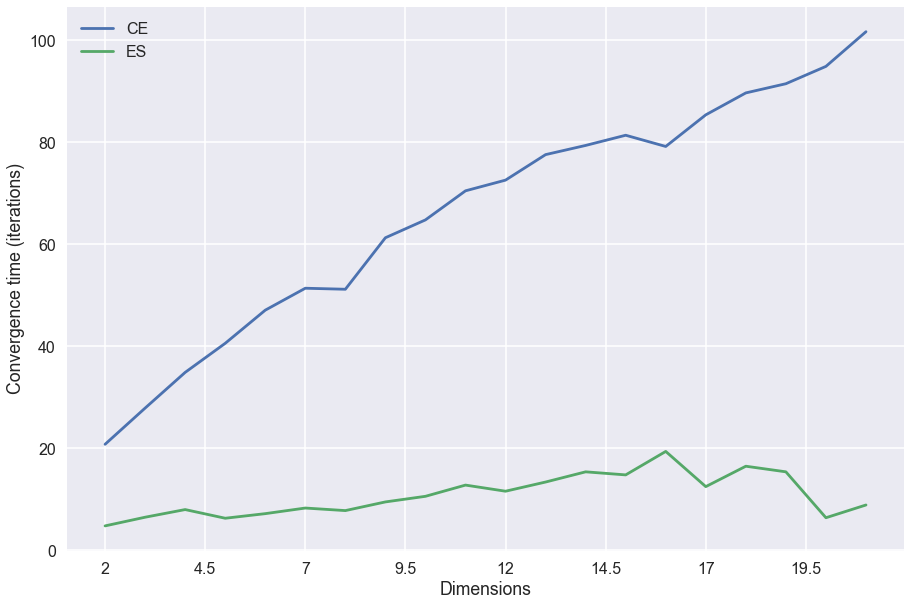

In [11]:
fig, ax = plt.subplots(figsize=(15,10))

ax.plot(np.mean(opt_time, axis=0))
ax.plot(np.mean(esopt_time, axis=0))
ax.set_xlabel(r"Dimensions")
ax.set_ylabel(r"Convergence time (iterations)")
#plt.legend([r"$N=1$", r"$\mu_{2}$", r"$\mu_{3}$", r"$\mu_{4}$", r"$\mu_{5}$"])

labels = [item.get_text() for item in ax.get_xticklabels()]
labels = [0,2,4.5,7,9.5,12,14.5,17,19.5,22]

ax.set_xticklabels(labels)
plt.legend(["CE", "ES"])

fig.savefig('dim_convergence.png', bbox_inches='tight', dpi=200)

### Convergence time for 5 dimensional problem with varying population size

In [40]:
pop_opt = np.zeros((20,50))
for j in range(20):
    for i, pop in enumerate(np.arange(25,75,1)):
        test_non = CEOptimiser(pop_size=pop, dims=5, init_var=3)
        test_non.optimise(num_evals=150, plot=False, weighted=False, sample_factor=5, tol=0.01)
        pop_opt[j,i] = test_non.fitness_log[-1]

 21%|██▏       | 32/150 [00:00<00:00, 131.10it/s]


In [41]:
espop_opt = np.zeros((20,50))
for j in range(20):
    for i, pop in enumerate(np.arange(25, 75, 1)):
        test = ESPopulation(pop_size=pop, dims=5)
        test.optimise(num_evals=150, plot=False, weighted=True, tol=0.01)
        espop_opt[j,i] = test.fitness_log[-1]

 19%|█▉        | 29/150 [00:01<00:06, 18.26it/s]


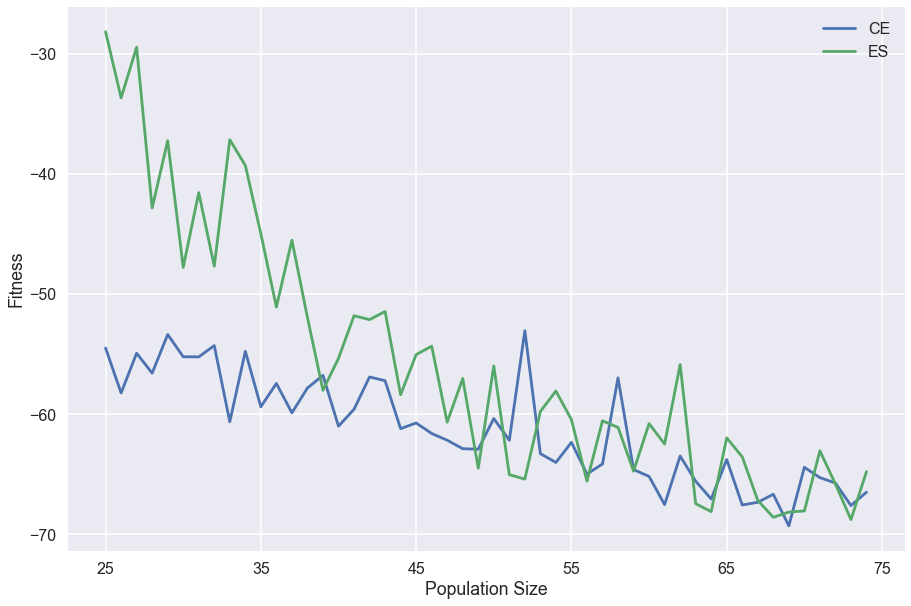

In [45]:
sns.set_context("poster")

fig, ax = plt.subplots(figsize=(15,10))

ax.plot(np.mean(pop_opt, axis=0))
ax.plot(np.mean(espop_opt, axis=0))
ax.set_xlabel(r"Population Size")
ax.set_ylabel(r"Fitness")
plt.legend(["CE", "ES"])

labels = [item.get_text() for item in ax.get_xticklabels()]
labels = [0,25,35,45,55,65,75]

ax.set_xticklabels(labels)

fig.savefig('pop_convergence.png', bbox_inches='tight', dpi=200)

### Ave fitness with varying population (i.e. whether it converges)

In [61]:
fit_opt_time = np.zeros((5,20))
for j in range(5):
    for i, pop in enumerate(np.arange(10, 410, 20)):
        test = CEOptimiser(pop_size=pop, dims=5, init_var=3)
        test.optimise(num_evals=200, plot=False, weighted=False, sample_factor=5, tol=0.01)
        print(min(test.fitness_log))
        fit_opt_time[j,i] = min(test.fitness_log)

  8%|▊         | 16/200 [00:00<00:02, 82.14it/s] 


-440.5828226448533
-1662.4831255877216


  8%|▊         | 17/200 [00:00<00:01, 163.01it/s]

-2770.809320425489


  2%|▏         | 4/200 [00:00<00:05, 36.48it/s]

-4536.204944038548


  2%|▏         | 4/200 [00:00<00:04, 39.30it/s]

-5832.2669692168265


  6%|▌         | 11/200 [00:00<00:01, 108.56it/s]

-7128.320753134581


  5%|▌         | 10/200 [00:00<00:02, 93.38it/s]

-8424.388566528261


  4%|▍         | 9/200 [00:00<00:02, 84.34it/s]

-11128.454052738185


  4%|▍         | 8/200 [00:00<00:02, 73.16it/s]

-11016.507112533223


  4%|▎         | 7/200 [00:00<00:03, 61.53it/s]

-14096.046949876472


  4%|▎         | 7/200 [00:00<00:03, 62.41it/s]

-15579.836983618605


  3%|▎         | 6/200 [00:00<00:03, 54.59it/s]

-14904.690326862747


  3%|▎         | 6/200 [00:00<00:03, 53.74it/s]

-18547.429206618373


  3%|▎         | 6/200 [00:00<00:03, 51.34it/s]

-20031.22684300236


  2%|▏         | 3/200 [00:00<00:07, 27.64it/s]

-21515.01795092906


  2%|▏         | 3/200 [00:00<00:07, 26.03it/s]

-22998.81388842053


  2%|▏         | 4/200 [00:00<00:04, 39.43it/s]

-24482.608995232677


  2%|▎         | 5/200 [00:00<00:04, 41.11it/s]

-25966.403326834446


  2%|▏         | 4/200 [00:00<00:05, 35.82it/s]

-27450.201843738454


  0%|          | 0/200 [00:00<?, ?it/s]

-28933.995309989226
-343.1761306368386
-1659.8805315624036


 10%|▉         | 19/200 [00:00<00:00, 185.89it/s]

-2770.8062406952117


  8%|▊         | 16/200 [00:00<00:01, 156.03it/s]

-4536.205293389645


  6%|▌         | 12/200 [00:00<00:01, 118.00it/s]

-6677.069809611331


  6%|▌         | 11/200 [00:00<00:01, 107.63it/s]

-6095.787073653317


  6%|▌         | 11/200 [00:00<00:01, 103.42it/s]

-9644.662046195783


  5%|▌         | 10/200 [00:00<00:02, 92.63it/s]

-9720.447392452357


  4%|▍         | 8/200 [00:00<00:02, 78.26it/s]

-12612.247610185912


  4%|▍         | 8/200 [00:00<00:02, 72.03it/s]

-14096.045898572858


  2%|▎         | 5/200 [00:00<00:04, 46.57it/s]

-15579.841943895557


  3%|▎         | 6/200 [00:00<00:03, 58.61it/s]

-17063.633726540695


  3%|▎         | 6/200 [00:00<00:03, 55.20it/s]

-18547.43164987092


  3%|▎         | 6/200 [00:00<00:03, 51.40it/s]

-20031.226289515176


  2%|▎         | 5/200 [00:00<00:04, 47.74it/s]

-21515.02159751512


  2%|▎         | 5/200 [00:00<00:04, 46.44it/s]

-22998.81440962061


  2%|▎         | 5/200 [00:00<00:04, 45.42it/s]

-24482.60966081237


  2%|▎         | 5/200 [00:00<00:04, 42.85it/s]

-25966.402067321138


  2%|▏         | 4/200 [00:00<00:05, 34.39it/s]

-27450.198228499197


  0%|          | 0/200 [00:00<?, ?it/s]

-28933.995521538665
-372.2511719222923
-1662.4804486985386


  0%|          | 0/200 [00:00<?, ?it/s]

-2770.807527528145
-4536.202817371794


  6%|▋         | 13/200 [00:00<00:01, 121.87it/s]

-5832.263759561416


  6%|▌         | 11/200 [00:00<00:01, 105.68it/s]

-7128.325953369949


  5%|▌         | 10/200 [00:00<00:01, 99.95it/s]

-9644.659305395351


  5%|▌         | 10/200 [00:00<00:02, 92.62it/s]

-11128.455751969528


  4%|▎         | 7/200 [00:00<00:02, 67.06it/s]

-12612.25135352391


  4%|▎         | 7/200 [00:00<00:02, 66.91it/s]

-14096.046503816378


  4%|▎         | 7/200 [00:00<00:03, 61.90it/s]

-15579.840348072117


  4%|▎         | 7/200 [00:00<00:03, 60.48it/s]

-17063.633959507722


  3%|▎         | 6/200 [00:00<00:03, 57.22it/s]

-18547.429462512984


  3%|▎         | 6/200 [00:00<00:03, 53.68it/s]

-20031.22699335166


  3%|▎         | 6/200 [00:00<00:03, 51.98it/s]

-21515.019865079834


  2%|▎         | 5/200 [00:00<00:03, 48.86it/s]

-22998.81552678129


  2%|▎         | 5/200 [00:00<00:04, 44.06it/s]

-24482.610985490934


  2%|▎         | 5/200 [00:00<00:04, 42.95it/s]

-25966.40632595887


  2%|▎         | 5/200 [00:00<00:04, 41.43it/s]

-27450.200738662745


  0%|          | 0/200 [00:00<?, ?it/s]

-28933.996386159262
-392.78342851255445
-1322.1638979365644


 10%|█         | 20/200 [00:00<00:00, 197.20it/s]

-2203.6290985530068


  8%|▊         | 15/200 [00:00<00:01, 145.13it/s]

-3879.13379831786


  7%|▋         | 14/200 [00:00<00:01, 136.80it/s]

-6677.068895825462


  6%|▌         | 12/200 [00:00<00:01, 116.03it/s]

-8160.863974318471


  6%|▌         | 11/200 [00:00<00:01, 101.63it/s]

-8424.388712842552


  4%|▍         | 9/200 [00:00<00:02, 89.40it/s]

-9720.44622139045


  4%|▎         | 7/200 [00:00<00:03, 63.56it/s]

-12612.249265684222


  4%|▎         | 7/200 [00:00<00:02, 66.78it/s]

-14096.043692838239


  2%|▎         | 5/200 [00:00<00:04, 47.96it/s]

-15579.839825057967


  4%|▎         | 7/200 [00:00<00:03, 60.78it/s]

-17063.635869937938


  3%|▎         | 6/200 [00:00<00:03, 53.38it/s]

-18547.4309250322


  2%|▎         | 5/200 [00:00<00:04, 46.10it/s]

-20031.227717821545


  2%|▎         | 5/200 [00:00<00:04, 46.35it/s]

-21515.01862507116


  2%|▎         | 5/200 [00:00<00:04, 46.11it/s]

-22998.812193099933


  2%|▎         | 5/200 [00:00<00:04, 44.07it/s]

-24482.611273594714


  2%|▏         | 4/200 [00:00<00:05, 36.51it/s]

-25966.40611011222


  2%|▏         | 4/200 [00:00<00:05, 36.99it/s]

-27450.201228685783


  0%|          | 0/200 [00:00<?, ?it/s]

-28933.99535838685
-356.72694360375414
-1322.1709966183278


  0%|          | 0/200 [00:00<?, ?it/s]

-3240.1431768339835
-4399.221666558333


  7%|▋         | 14/200 [00:00<00:01, 134.48it/s]

-5832.2655115707585


  6%|▌         | 11/200 [00:00<00:01, 104.84it/s]

-8160.865121667415


  5%|▌         | 10/200 [00:00<00:01, 95.31it/s]

-9644.660274688287


  4%|▍         | 9/200 [00:00<00:02, 84.67it/s]

-11128.455686561161


  4%|▍         | 8/200 [00:00<00:02, 77.63it/s]

-12612.249999822228


  4%|▎         | 7/200 [00:00<00:02, 68.82it/s]

-14096.043011747215


  2%|▏         | 4/200 [00:00<00:05, 37.80it/s]

-15579.840292634692


  0%|          | 1/200 [00:00<00:25,  7.75it/s]

-17063.636477529293


  4%|▎         | 7/200 [00:00<00:03, 60.07it/s]

-18547.429070397175


  3%|▎         | 6/200 [00:00<00:03, 57.18it/s]

-20031.22467834086


  2%|▎         | 5/200 [00:00<00:04, 44.89it/s]

-21515.01821768643


  2%|▎         | 5/200 [00:00<00:04, 46.97it/s]

-22998.812625757455


  2%|▎         | 5/200 [00:00<00:03, 49.52it/s]

-24482.610049060422


  2%|▎         | 5/200 [00:00<00:04, 45.46it/s]

-25966.40687990952


  2%|▎         | 5/200 [00:00<00:04, 42.88it/s]

-27450.201974651936


 22%|██▎       | 45/200 [00:01<00:03, 40.99it/s]

-28933.994438641515


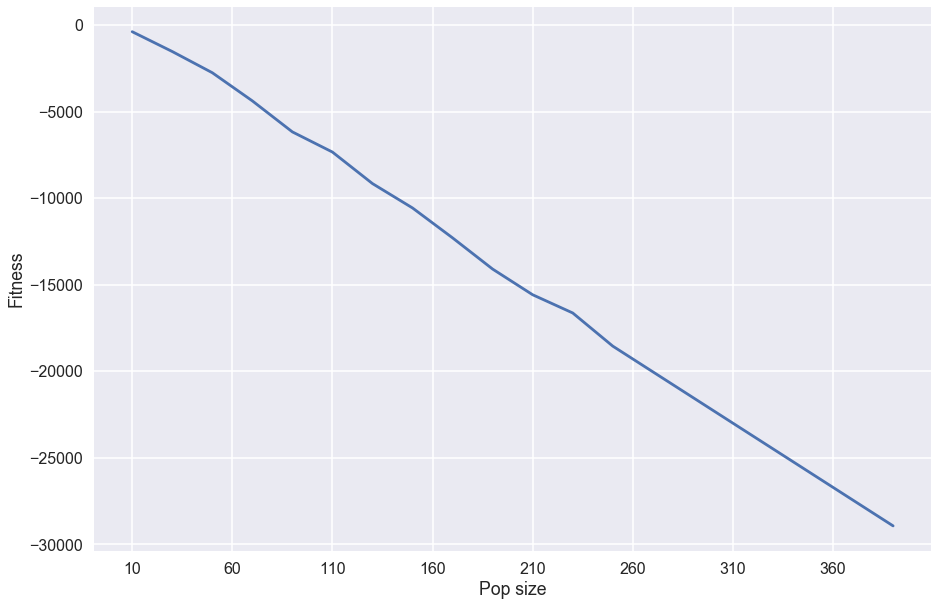

In [65]:
fig, ax = plt.subplots(figsize=(15,10))

ax.plot(np.mean(fit_opt_time, axis=0))
ax.set_xlabel(r"Pop size")
ax.set_ylabel(r"Fitness")
#plt.legend([r"$N=1$", r"$\mu_{2}$", r"$\mu_{3}$", r"$\mu_{4}$", r"$\mu_{5}$"])

labels = [item.get_text() for item in ax.get_xticklabels()]
labels = [0,10,60,110,160,210,260,310,360,410,410]

ax.set_xticklabels(labels)

fig.savefig('ce_fititer.png', bbox_inches='tight', dpi=200)

### Time per iteration with varying dimensions and pop size (surface)

In [62]:
fit_time_time = np.zeros(19)
for j, pop in enumerate(np.arange(20,210,10)):
    test = CEOptimiser(pop_size=pop, dims=5, init_var=3)
    test.optimise(num_evals=200, plot=False, weighted=False, sample_factor=5, tol=0.01)
    fit_time_time[j] = np.mean(test.timings)

 20%|█▉        | 39/200 [00:00<00:02, 70.65it/s]


In [63]:
fites_time_time = np.zeros(19)
for j, pop in enumerate(np.arange(20,210,10)):
    test = ESPopulation(pop_size=pop, dims=5)
    test.optimise(num_evals=200, plot=False, weighted=False, tol=0.01)
    fites_time_time[j] = np.mean(test.timings)

  2%|▏         | 3/200 [00:00<00:38,  5.14it/s]


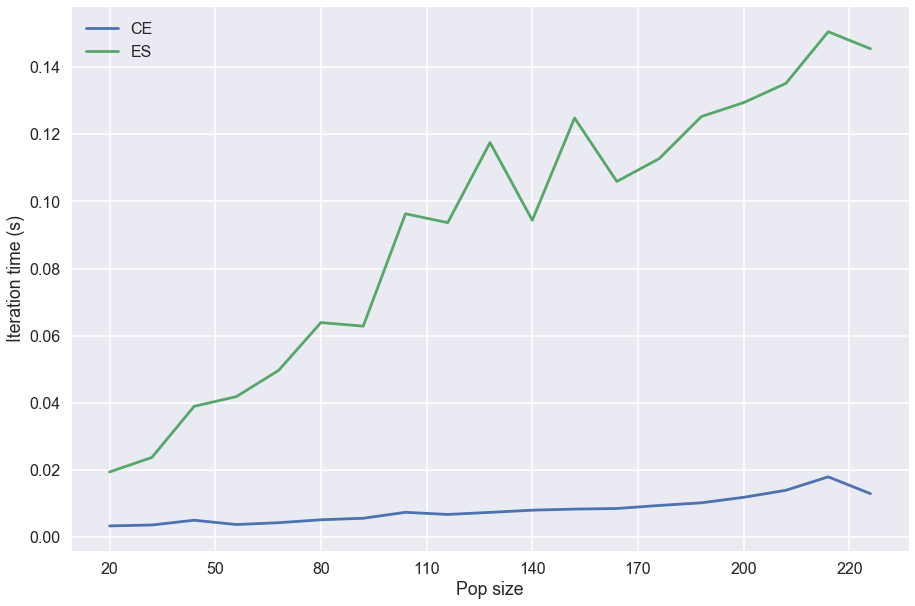

In [69]:
fig, ax = plt.subplots(figsize=(15,10))

ax.plot(fit_time_time)
ax.plot(fites_time_time)
ax.set_xlabel(r"Pop size")
ax.set_ylabel(r"Iteration time (s)")
plt.legend(["CE", "ES"])

labels = [item.get_text() for item in ax.get_xticklabels()]
labels = [0,20,50,80,110,140,170,200,220]

ax.set_xticklabels(labels)

fig.savefig('ce_fititer.png', bbox_inches='tight', dpi=200)

### some plots for report

100%|██████████| 60/60 [00:43<00:00,  1.39it/s]


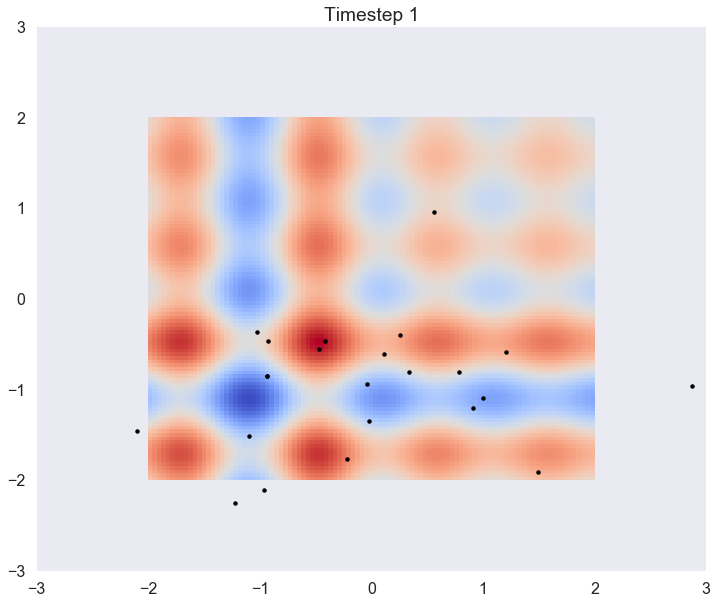

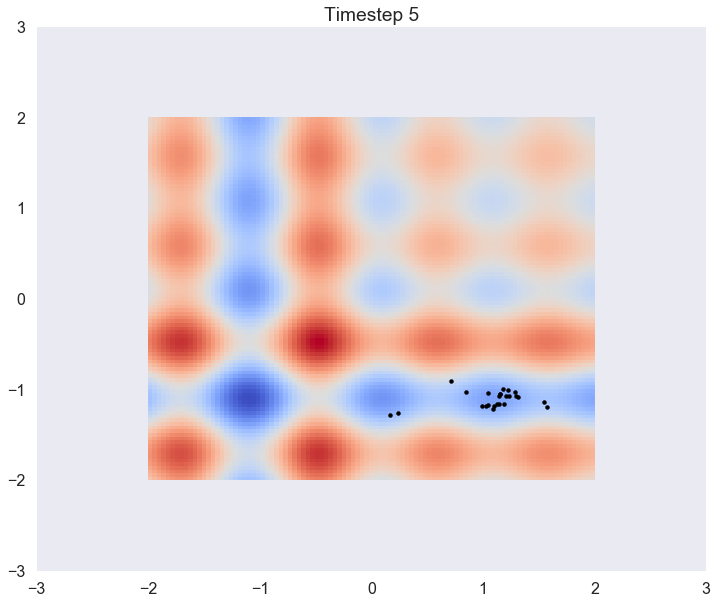

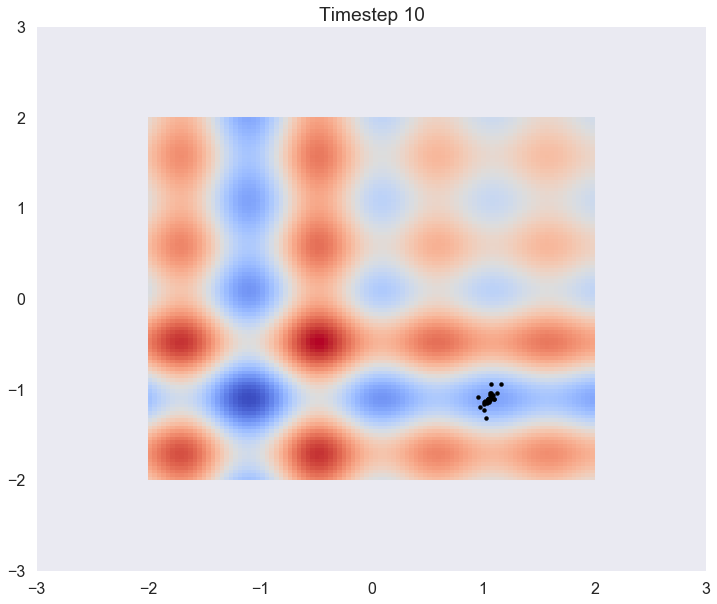

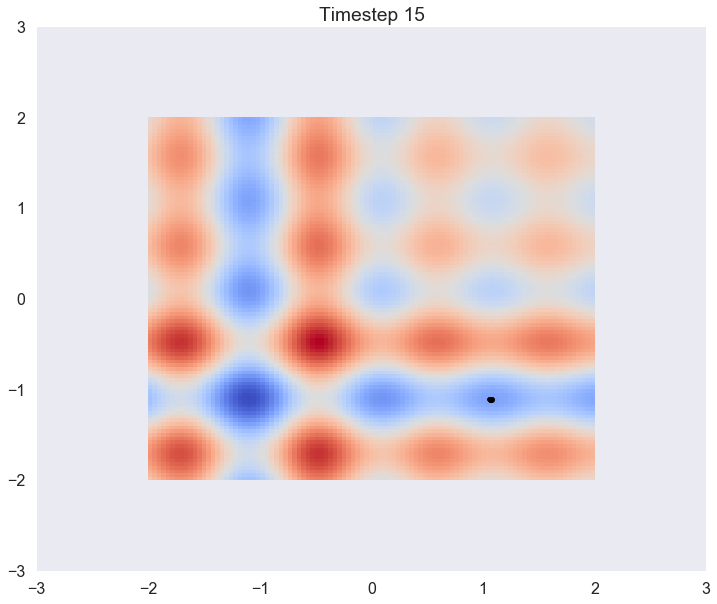

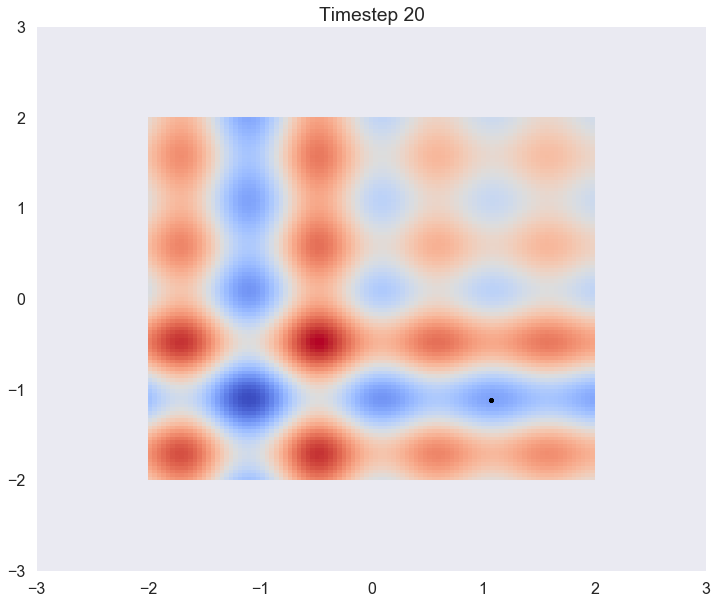

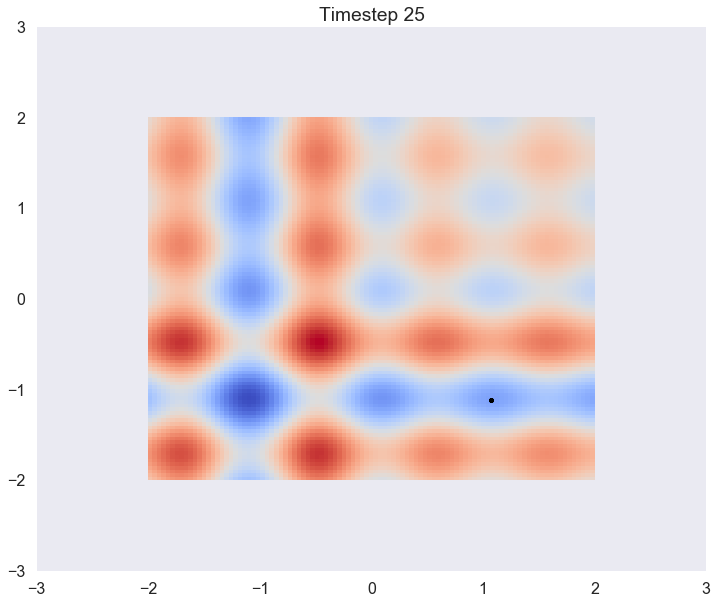

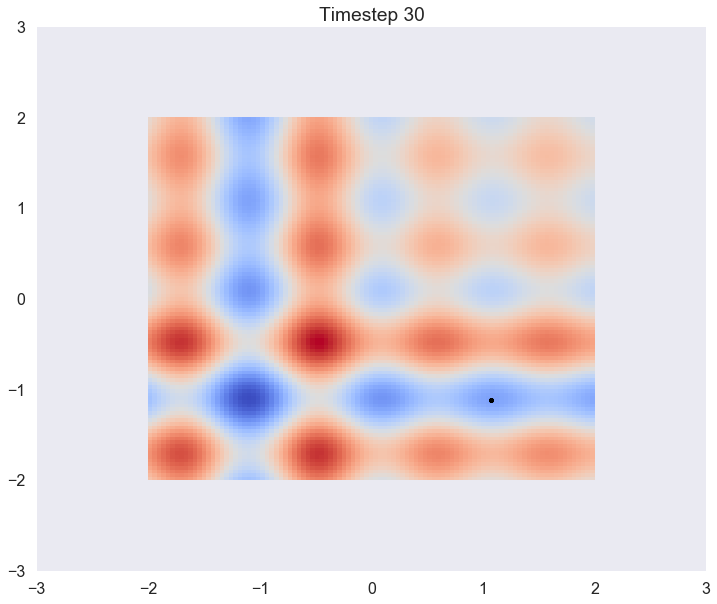

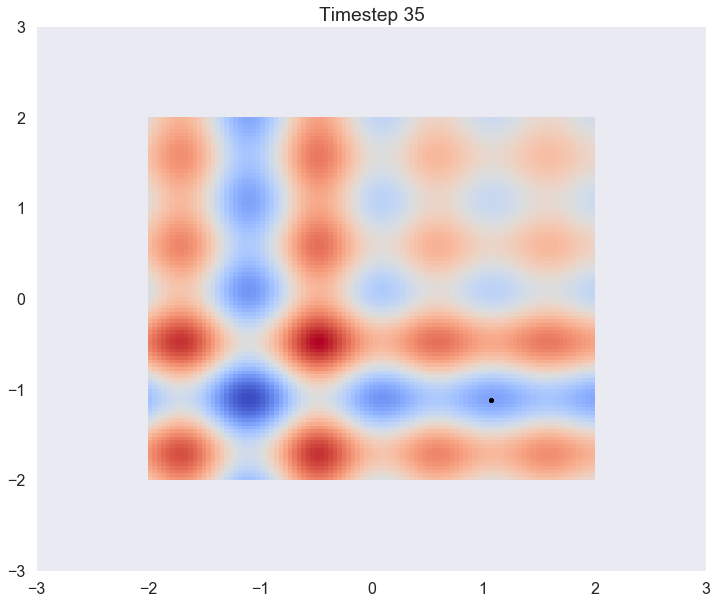

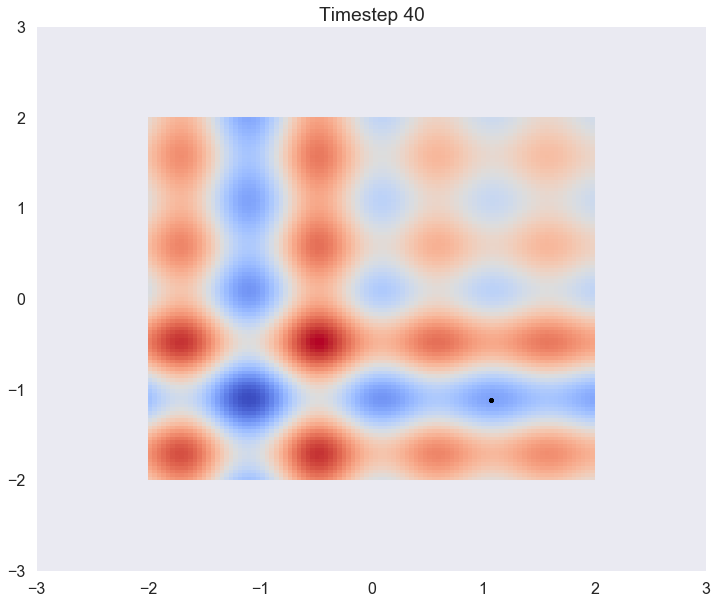

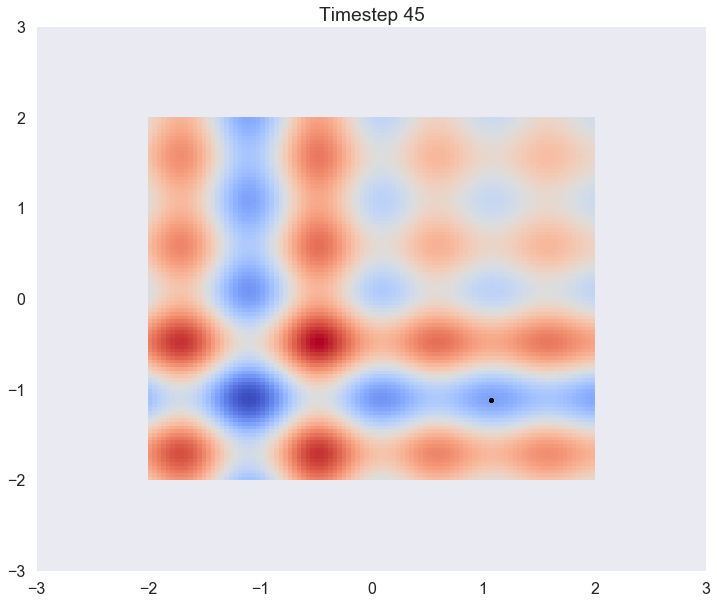

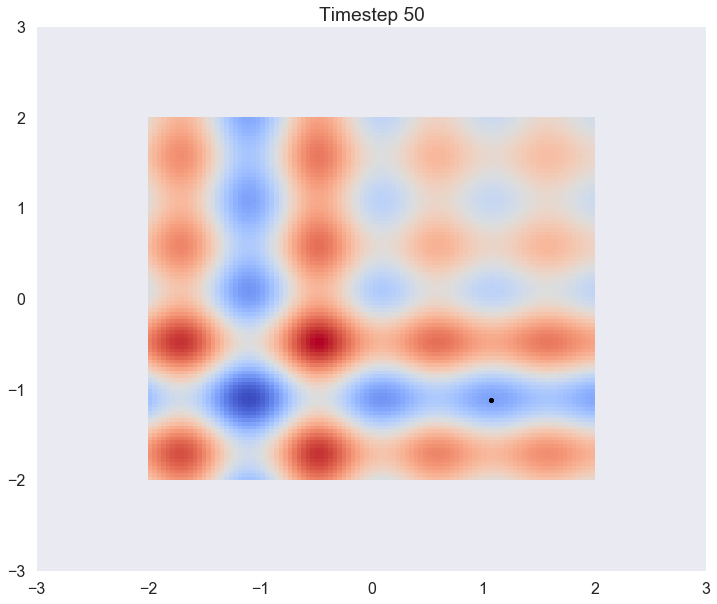

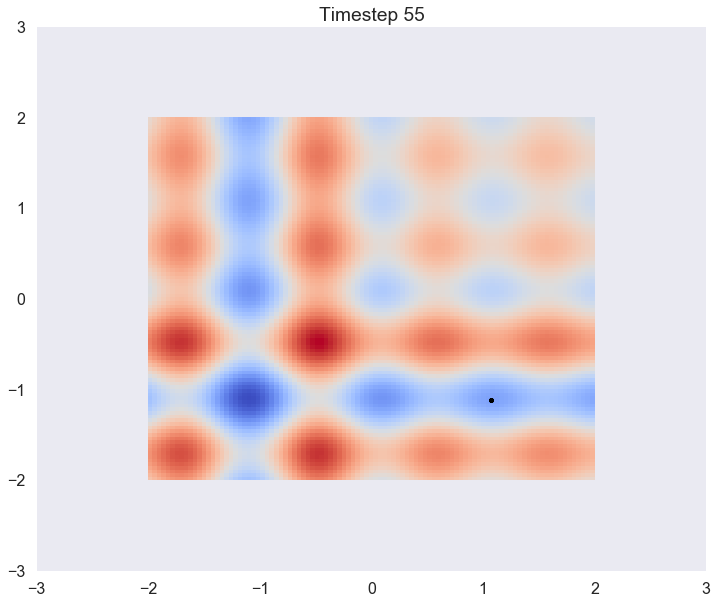

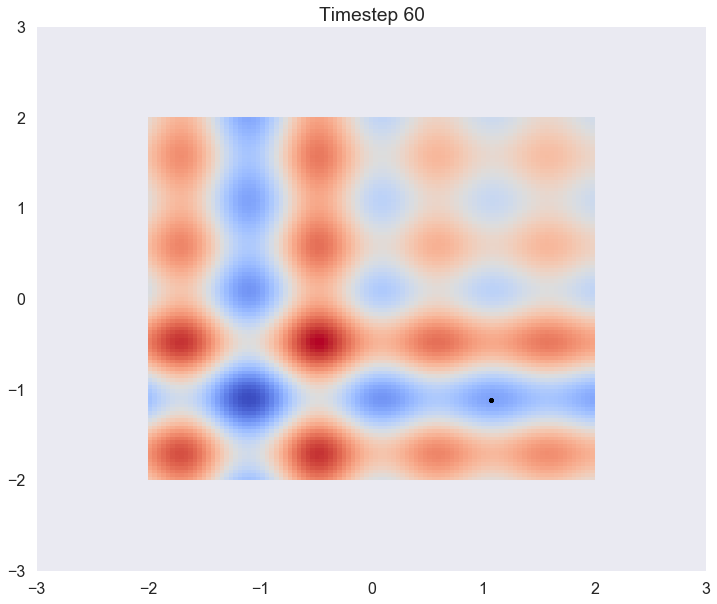

In [20]:
sns.set_context("poster")
test12 = ESPopulation(pop_size=25, dims=2)
test12.optimise(num_evals=60, plot=True, weighted=True, tol=0)